# Simple Grid Search Example

**Attention:** This example is meant to show how a grid search would be implemented in Python. The Iris dataset is as close to a perfect dataset as you can get so the results of the grid search may not be as conclusive as they would be in more practical applications.

In [6]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = df.drop('Name', 1)
y = df['Name']

# Perform Grid Search

Run a grid search on the n_estimators parameter for values 1-20…

In [9]:
scores = []
for i in range(1, 21):
    # model -- the only change is to set the 'oob_score' argument to 'True'
    oob_forest = RandomForestClassifier(oob_score = True, n_estimators = i)

    # train
    oob_forest.fit(X, y)

    # Out of bag score
    scores.append(oob_forest.oob_score_)

scores = pd.Series(scores, index = range(1, 21))

C:\Users\lk6me\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\lk6me\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\lk6me\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\lk6me\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\lk6me\AppData\Local\Continuum\anaco

## Plot the scores and find an optimal value

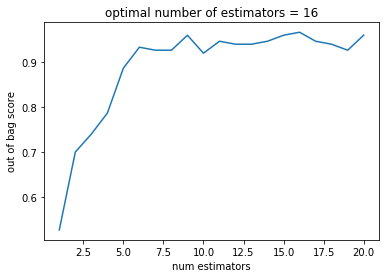

In [10]:
plt.plot(range(1, 21), scores)
plt.xlabel('num estimators')
plt.ylabel('out of bag score')
plt.title('optimal number of estimators = ' + str(scores.idxmax()))
plt.show()